Develop a knn-classifier model using Python. Use a fixed value of k such as 1. Preprocess
attributes with MinMaxScaler(). Follow the steps shown in video 13.

In [1]:
    import numpy as np
    import pandas as pd
    from pandas import Series, DataFrame
    import matplotlib.pyplot as plt
    import sklearn.datasets
    df = DataFrame()
    df = pd.read_excel('ENGG_319_Cure_3.xlsx')
    df

,Instance,Player Name,Position,Age,Games Played,Minutes Played,Field Goals Attempted,Field Goal%,effective Field Goal%,Rebounds,Assists,Points,All_Star
0,1,Mikal Bridges,Forward,25,82,2854,858,0.534,0.601,347,185,1162,N
1,2,Miles Bridges,Forward,23,80,2837,1214,0.491,0.554,559,300,1613,N
2,3,DeMar DeRozan,Forward,32,76,2743,1535,0.504,0.521,392,374,2118,Y
3,4,Jayson Tatum,Forward,23,76,2731,1564,0.453,0.526,609,334,2046,Y
4,5,Saddiq Bey,Forward,22,82,2704,1136,0.396,0.489,441,233,1321,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,268,Lamar Stevens,Forward,24,63,1015,319,0.489,0.517,164,44,383,N
268,269,Cam Reddish,Forward,22,49,1012,408,0.404,0.485,105,48,497,N
269,270,Donte DiVincenzo,Guard,25,42,1006,336,0.351,0.461,170,118,380,N
270,271,Wesley Matthews,Guard,35,49,1002,220,0.395,0.516,92,36,249,N


## Divide the Data Into Training and Test Set

In [2]:
sy = df.All_Star
df.drop(df.columns[[1,2,12]], axis=1, inplace=True)
sy

0      N
1      N
2      Y
3      Y
4      N
      ..
267    N
268    N
269    N
270    N
271    N
Name: All_Star, Length: 272, dtype: object

In [3]:
dfx = df
df

,Instance,Age,Games Played,Minutes Played,Field Goals Attempted,Field Goal%,effective Field Goal%,Rebounds,Assists,Points
0,1,25,82,2854,858,0.534,0.601,347,185,1162
1,2,23,80,2837,1214,0.491,0.554,559,300,1613
2,3,32,76,2743,1535,0.504,0.521,392,374,2118
3,4,23,76,2731,1564,0.453,0.526,609,334,2046
4,5,22,82,2704,1136,0.396,0.489,441,233,1321
...,...,...,...,...,...,...,...,...,...,...
267,268,24,63,1015,319,0.489,0.517,164,44,383
268,269,22,49,1012,408,0.404,0.485,105,48,497
269,270,25,42,1006,336,0.351,0.461,170,118,380
270,271,35,49,1002,220,0.395,0.516,92,36,249


In [4]:
from sklearn.model_selection import train_test_split
dfx_train, dfx_test, sy_train, sy_test = train_test_split(dfx, sy)

In [5]:
dfx_train, dfx_test, sy_train, sy_test

(     Instance  Age  Games Played  Minutes Played  Field Goals Attempted  \
 103       104   25            70            1919                    639   
 179       180   26            51            1481                    767   
 203       204   32            54            1361                    468   
 46         47   27            71            2296                    718   
 37         38   23            78            2335                    576   
 ..        ...  ...           ...             ...                    ...   
 128       129   30            82            1798                    401   
 101       102   32            57            1931                    829   
 265       266   25            63            1021                    338   
 5           6   21            77            2695                    909   
 204       205   34            62            1353                    320   
 
      Field Goal%  effective Field Goal%  Rebounds  Assists  Points  
 103        0.44

## Data Preprocessing

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le = le.fit(sy_train)
le.classes_

array(['N', 'Y'], dtype=object)

In [7]:
y_train = le.transform(sy_train)
sy_train, y_train

(103    N
 179    N
 203    N
 46     N
 37     N
       ..
 128    N
 101    Y
 265    N
 5      N
 204    N
 Name: All_Star, Length: 204, dtype: object,
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0]))

In [8]:
dfx_train.to_numpy()

array([[ 104.,   25.,   70., ...,  229.,  146.,  833.],
       [ 180.,   26.,   51., ...,  411.,  119., 1030.],
       [ 204.,   32.,   54., ...,  182.,  225.,  534.],
       ...,
       [ 266.,   25.,   63., ...,  122.,  153.,  400.],
       [   6.,   21.,   77., ...,  311.,  628., 1181.],
       [ 205.,   34.,   62., ...,  157.,   64.,  366.]])

In [9]:
n1 = preprocessing.StandardScaler()
n1 = n1.fit(dfx_train.to_numpy())
x_train = n1.transform(dfx_train.to_numpy())
x_train

array([[-0.4923413 , -0.26490337,  0.4683288 , ..., -0.48617842,
        -0.31485608,  0.01573085],
       [ 0.52137179, -0.03688528, -1.34873069, ...,  0.53879645,
        -0.5197506 ,  0.51906784],
       [ 0.84149171,  1.33122326, -1.06182656, ..., -0.75086973,
         0.28465013, -0.74821718],
       ...,
       [ 1.66846818, -0.26490337, -0.20111417, ..., -1.08877354,
        -0.26173527, -1.09058853],
       [-1.79949765, -1.17697573,  1.13777177, ..., -0.02437656,
         3.34289065,  0.90487437],
       [ 0.85483004,  1.78725944, -0.29674888, ..., -0.89166299,
        -0.93712834, -1.17745888]])

## Building the Machine Learning model for classification

In [10]:
x_train.shape

(204, 10)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

test = []
train = []
i = 1
while i < 33 :

    knn = KNeighborsClassifier(n_neighbors = i)
    knn = knn.fit(x_train,y_train)
    y_test = le.transform(sy_test.to_numpy())
    x_test = n1.transform(dfx_test.to_numpy())
    knn.predict(x_test)
    
    a = knn.score(x_test,y_test)
    b = knn.score(x_train,y_train)

    test.append(a)
    train.append(b)
    i += 1
    

## Evaluation of the model

In [12]:
test

[0.8676470588235294,
 0.9411764705882353,
 0.9558823529411765,
 0.9558823529411765,
 0.9558823529411765,
 0.9558823529411765,
 0.9558823529411765,
 0.9558823529411765,
 0.9411764705882353,
 0.9558823529411765,
 0.9264705882352942,
 0.9117647058823529,
 0.9117647058823529,
 0.8970588235294118,
 0.9117647058823529,
 0.9117647058823529,
 0.9117647058823529,
 0.9264705882352942,
 0.9117647058823529,
 0.8970588235294118,
 0.8970588235294118,
 0.8970588235294118,
 0.8970588235294118,
 0.9117647058823529,
 0.9117647058823529,
 0.9117647058823529,
 0.9117647058823529,
 0.9117647058823529,
 0.9117647058823529,
 0.8970588235294118,
 0.9117647058823529,
 0.8970588235294118]

In [13]:
train

[1.0,
 0.9558823529411765,
 0.9656862745098039,
 0.9558823529411765,
 0.946078431372549,
 0.9607843137254902,
 0.9607843137254902,
 0.946078431372549,
 0.9509803921568627,
 0.9509803921568627,
 0.9411764705882353,
 0.9411764705882353,
 0.9411764705882353,
 0.9313725490196079,
 0.9362745098039216,
 0.9264705882352942,
 0.9264705882352942,
 0.9264705882352942,
 0.9362745098039216,
 0.9313725490196079,
 0.9362745098039216,
 0.9215686274509803,
 0.9215686274509803,
 0.9166666666666666,
 0.9264705882352942,
 0.9117647058823529,
 0.9117647058823529,
 0.9019607843137255,
 0.8970588235294118,
 0.9019607843137255,
 0.9019607843137255,
 0.9019607843137255]

In [14]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0])

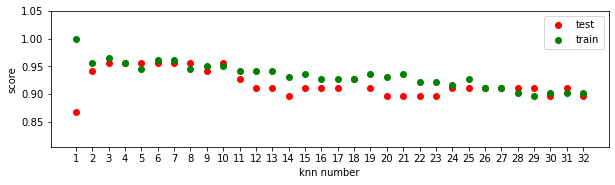

In [15]:
i = 1
count = []
while i < 33:
    count.append(i)
    i += 1

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,2.5))
axs.scatter(count, test, color = 'red', label = 'test')
axs.scatter(count, train, color = 'green', label = 'train')
axs.set_xticks(count)
axs.set_ylim(0.805,1.05)
axs.set_xlabel('knn number')
axs.set_ylabel('score')
axs.legend()